In [ ]:
# This is a test code by jupyter lab with anaconda

In [1]:
print('hello world')

hello world


In [4]:
for i in range(10):
    print (i)

0
1
2
3
4
5
6
7
8
9


In [8]:
import pandas as pd
#import mysql.connector
import psycopg2
import matplotlib.pyplot as plt

# Connect to PostgreSQL database
pg_conn = psycopg2.connect(
    host="10.66.5.20",
    database="analysis_db",
    user="data_analysis",
    password="data_analysis"
)

# SQL query to extract data from PostgreSQL
pg_query = "select total_trans_amt, total_income_amt, total_cost_amt, total_refund_amt, data_source from anl_newpay_management_summary where data_source = '010003' and source_trans_date = '20230404';"

# Use pandas to read PostgreSQL data into a dataframe
pg_df = pd.read_sql(pg_query, pg_conn)

pg_df.head()

'''
# Create a table from the merged dataframe
table = pd.pivot_table(pg_df, values='anl_newpay_management_summary', index=['2023-04-04'], columns=['total_trans_amt, total_income_amt, total_cost_amt, total_refund_amt, data_source'])

# Plot a line graph from the table
table.plot(kind='line')
plt.show()
'''

C:\Users\john_\AppData\Local\Temp\ipykernel_7456\2869636003.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pg_df = pd.read_sql(pg_query, pg_conn)


"\n# Create a table from the merged dataframe\ntable = pd.pivot_table(pg_df, values='anl_newpay_management_summary', index=['2023-04-04'], columns=['total_trans_amt, total_income_amt, total_cost_amt, total_refund_amt, data_source'])\n\n# Plot a line graph from the table\ntable.plot(kind='line')\nplt.show()\n"

In [68]:
#推荐使用SQLAlchemy，需要先安装SQLAlchemy库
#新版本的pandas库中con参数使用sqlalchemy库创建的create_engine对象 。创建create_engine对象(格式类似于URL地址)
#
'''
# import necessary packages
import pandas
import psycopg2
from sqlalchemy import create_engine
  
# establish connection with the database
engine = create_engine(
    "dialect+driver//username:password@hostname:portnumber/databasename")
  
# read the pandas dataframe
data = pandas.read_csv("path to dataset")
  
# connect the pandas dataframe with postgresql table
data.to_sql('loan_data', engine, if_exists='replace')
'''
from sqlalchemy import create_engine
import psycopg2
import pandas as pd
from IPython.display import display

#pg db config
PG_HOST = '10.66.5.20'
PG_PORT = '5432'
PG_USER = 'data_analysis'
PG_PASSWD = 'data_analysis'
PG_DB = 'analysis_db'

url = f"postgresql://{PG_USER}:{PG_PASSWD}@{PG_HOST}:{PG_PORT}/{PG_DB}"

#engine = create_engine(url, pool_size = 50, echo=False)
engine = create_engine(url)

# SQL query to extract data from PostgreSQL
pg_query = "select source_trans_date, total_trans_amt, total_income_amt, total_cost_amt, total_refund_amt, data_source from anl_newpay_management_summary where data_source = '010003' and source_trans_date in ('20230401','20230402','20230403','20230404');"

# Use pandas to read PostgreSQL data into a dataframe
pg_df = pd.read_sql(pg_query, engine)

# Print the dataframe
#print(pg_df)
#pg_df.tail()
display(pg_df)

,source_trans_date,total_trans_amt,total_income_amt,total_cost_amt,total_refund_amt,data_source
0,20230401,2290938.65,1037.51,376.21,2575.00,010003
1,20230402,250584.21,533.85,189.53,7641.87,010003
2,20230403,69644662.02,16565.70,720.27,14732.89,010003
3,20230404,80971687.25,29144.01,1693.39,23129.56,010003


total_cost_amt  total_income_amt  \
data_source source_trans_date                                     
010003      20230401                   376.21           1037.51   
            20230402                   189.53            533.85   
            20230403                   720.27          16565.70   
            20230404                  1693.39          29144.01   

                               total_trans_amt  
data_source source_trans_date                   
010003      20230401                2290938.65  
            20230402                 250584.21  
            20230403               69644662.02  
            20230404               80971687.25

+------------------------+---------+----------+-------------+
|                        |    k    |    e     |      y      |
+------------------------+---------+----------+-------------+
| ('010003', '20230401') | 376.21  | 1037.51  | 2290938.65  |
| ('010003', '20230402') | 189.53  |  533.85  |  250584.21  |
| ('010003', '20230403') | 720.27  | 16565.7  | 69644662.02 |
| ('010003', '20230404') | 1693.39 | 29144.01 | 80971687.25 |
+------------------------+---------+----------+-------------+


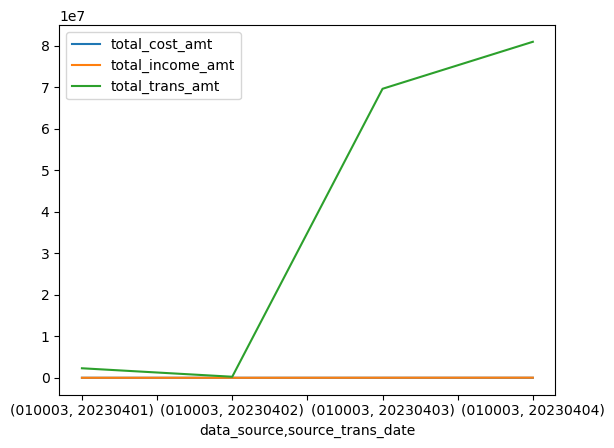

In [21]:
table = pd.pivot_table(pg_df, values=[u'total_trans_amt', u'total_income_amt', u'total_cost_amt'], index=[ u'data_source',u'source_trans_date'])

#table.tail()
#print(table)
display(table)

from tabulate import tabulate

print(tabulate(table, headers = 'key', tablefmt= 'pretty'))

table.plot(kind='line')
plt.show()



In [22]:
table.loc[:, "lirun"] = table["total_income_amt"] - table["total_cost_amt"]
display(table)

total_cost_amt  total_income_amt  \
data_source source_trans_date                                     
010003      20230401                   376.21           1037.51   
            20230402                   189.53            533.85   
            20230403                   720.27          16565.70   
            20230404                  1693.39          29144.01   

                               total_trans_amt     lirun  
data_source source_trans_date                             
010003      20230401                2290938.65    661.30  
            20230402                 250584.21    344.32  
            20230403               69644662.02  15845.43  
            20230404               80971687.25  27450.62

In [24]:
import numpy as np

# Create a 3x3 random number matrix
data = np.random.rand(3, 3)

# Convert matrix to DataFrame
df = pd.DataFrame(data, columns=['销售金额1', '销售金额2', '销售金额3'], index=['日期1', '日期2', '日期3'])

# Shift values in '销售金额1' column down by one row and create new column '前一天销售金额'
df['前一天销售金额'] = df['销售金额1'].shift(1)

# Print modified DataFrame
print(df)

        销售金额1     销售金额2     销售金额3   前一天销售金额
日期1  0.835259  0.068372  0.997739       NaN
日期2  0.208290  0.742940  0.021540  0.835259
日期3  0.418077  0.793431  0.382902  0.208290


In [25]:
# 使用shift方法将销售金额列向下移动一行，然后将新列命名为'前一天销售金额'
df['前一天销售金额'] = df['销售金额1'].shift(1)

# 再添加一行，来计算当天与前一天销售金额的环比
df['销售金额环比'] = df['销售金额1'] / df['前一天销售金额'] - 1

print(df)

        销售金额1     销售金额2     销售金额3   前一天销售金额    销售金额环比
日期1  0.835259  0.068372  0.997739       NaN       NaN
日期2  0.208290  0.742940  0.021540  0.835259 -0.750629
日期3  0.418077  0.793431  0.382902  0.208290  1.007192


In [27]:
# 使用pop方法将前一天销售金额的整列弹出，然后插入到销售金额1的后面
df.insert(1, '前一天销售金额', df.pop('前一天销售金额'))
display(df)

,销售金额1,前一天销售金额,销售金额2,销售金额3,销售金额环比
日期1,0.835259,NaN,0.068372,0.997739,NaN
日期2,0.208290,0.835259,0.742940,0.021540,-0.750629
日期3,0.418077,0.208290,0.793431,0.382902,1.007192


In [77]:
'''
#pg db config
PG_HOST = '10.66.5.20'
PG_PORT = '5432'
PG_USER = 'data_analysis'
PG_PASSWD = 'data_analysis'
PG_DB = 'analysis_db'

url = f"postgresql://{PG_USER}:{PG_PASSWD}@{PG_HOST}:{PG_PORT}/{PG_DB}"

#engine = create_engine(url, pool_size = 50, echo=False)
engine = create_engine(url)

'''

cross_quey = "select source_trans_date, case when business_type = 'CROSS_1_1' then '跨境付款(离岸换汇)' when business_type = 'CROSS_1_2' then '跨境人民币付款' when business_type = 'CROSS_1_3' then '跨境人民币收款' when business_type = 'CROSS_1_4' then '网关与支付单报送' when business_type = 'CROSS_1_5' then '网关b2b支付' else 'UNKNOWN' end as business_type, sum(trans_count) as total_trans_count, sum(total_trans_amt) as total_trans_amt, sum(total_commission_amt + total_other_income_amt + total_income_amt) as total_income_amt, sum(total_cost_amt) as total_cost_amt from anl_cross_business_group_by where source_trans_date like '202303%%' group by source_trans_date, business_type order by source_trans_date, business_type;"
#cross_quey = "select source_trans_date, case when business_type = 'CROSS_1_1' then '跨境付款(离岸换汇)' when business_type = 'CROSS_1_2' then '跨境人民币付款' when business_type = 'CROSS_1_3' then '跨境人民币收款' when business_type = 'CROSS_1_4' then '网关与支付单报送' when business_type = 'CROSS_1_5' then '网关b2b支付' else 'UNKNOWN' end as business_type, sum(trans_count) as total_trans_count, sum(total_trans_amt) as total_trans_amt, sum(total_commission_amt + total_other_income_amt + total_income_amt) as total_income_amt, sum(total_cost_amt) as total_cost_amt from anl_cross_business_group_by where source_trans_date = '20230310' group by source_trans_date, business_type order by source_trans_date, business_type;"

pg_cross_df = pd.read_sql(cross_quey, engine)

#pg_cross_df.head()
display(pg_cross_df)


#add a clolumns
pg_cross_df['total_profit'] = pg_cross_df['total_income_amt'] - pg_cross_df['total_cost_amt']
display(pg_cross_df)



,source_trans_date,business_type,total_trans_count,total_trans_amt,total_income_amt,total_cost_amt
0,20230310,网关与支付单报送,588.0,514361.36,3282.95,1034.59
1,20230310,跨境人民币付款,7.0,2584404.70,2165.22,250.00
2,20230310,跨境人民币收款,4.0,18960768.32,4413.77,0.00
3,20230311,网关与支付单报送,774.0,163472.02,1018.21,332.24
4,20230312,网关与支付单报送,419.0,102350.41,672.91,210.13
...,...,...,...,...,...,...
59,20230330,跨境人民币收款,5.0,26848886.40,9064.04,0.00
60,20230330,跨境付款(离岸换汇),1.0,481188.00,5705.65,215.25
61,20230331,网关与支付单报送,672.0,212862.56,1390.75,428.17
62,20230331,跨境人民币付款,13.0,4858342.90,3637.05,778.62


,source_trans_date,business_type,total_trans_count,total_trans_amt,total_income_amt,total_cost_amt,total_profit
0,20230310,网关与支付单报送,588.0,514361.36,3282.95,1034.59,2248.36
1,20230310,跨境人民币付款,7.0,2584404.70,2165.22,250.00,1915.22
2,20230310,跨境人民币收款,4.0,18960768.32,4413.77,0.00,4413.77
3,20230311,网关与支付单报送,774.0,163472.02,1018.21,332.24,685.97
4,20230312,网关与支付单报送,419.0,102350.41,672.91,210.13,462.78
...,...,...,...,...,...,...,...
59,20230330,跨境人民币收款,5.0,26848886.40,9064.04,0.00,9064.04
60,20230330,跨境付款(离岸换汇),1.0,481188.00,5705.65,215.25,5490.40
61,20230331,网关与支付单报送,672.0,212862.56,1390.75,428.17,962.58
62,20230331,跨境人民币付款,13.0,4858342.90,3637.05,778.62,2858.43


"\npg_cross_df = pg_cross_df.rename(columns={u'source_trans_date': '日期', u'business_type': '业务类型', u'total_trans_amt': '交易金额', u'total_income_amt': '收入', u'total_cost_amt': '成本'})\ndisplay(pg_cross_df)\n\ntable_cross = pd.pivot_table(pg_cross_df, values=[u'交易金额', u'收入', u'成本'], index=[ u'日期', u'业务类型'])\ndisplay(table_cross)\n\n"

In [82]:

pg_cross_df = pg_cross_df.rename(columns={u'source_trans_date': '日期', u'business_type': '业务类型', u'total_trans_count': '交易笔数', u'total_trans_amt': '交易金额', u'total_income_amt': '收入', u'total_cost_amt': '成本', u'total_profit': '毛利'})
display(pg_cross_df)

table_cross = pd.pivot_table(pg_cross_df, values=[u'交易金额', u'交易笔数', u'收入', u'成本', u'毛利'], index=[ u'日期', u'业务类型'])
display(table_cross)



,日期,业务类型,交易笔数,交易金额,收入,成本,毛利
0,20230310,网关与支付单报送,588.0,514361.36,3282.95,1034.59,2248.36
1,20230310,跨境人民币付款,7.0,2584404.70,2165.22,250.00,1915.22
2,20230310,跨境人民币收款,4.0,18960768.32,4413.77,0.00,4413.77
3,20230311,网关与支付单报送,774.0,163472.02,1018.21,332.24,685.97
4,20230312,网关与支付单报送,419.0,102350.41,672.91,210.13,462.78
...,...,...,...,...,...,...,...
59,20230330,跨境人民币收款,5.0,26848886.40,9064.04,0.00,9064.04
60,20230330,跨境付款(离岸换汇),1.0,481188.00,5705.65,215.25,5490.40
61,20230331,网关与支付单报送,672.0,212862.56,1390.75,428.17,962.58
62,20230331,跨境人民币付款,13.0,4858342.90,3637.05,778.62,2858.43


交易笔数         交易金额       成本       收入       毛利
日期       业务类型                                                     
20230310 网关与支付单报送    588.0    514361.36  1034.59  3282.95  2248.36
         跨境人民币付款       7.0   2584404.70   250.00  2165.22  1915.22
         跨境人民币收款       4.0  18960768.32     0.00  4413.77  4413.77
20230311 网关与支付单报送    774.0    163472.02   332.24  1018.21   685.97
20230312 网关与支付单报送    419.0    102350.41   210.13   672.91   462.78
...                    ...          ...      ...      ...      ...
20230330 跨境人民币收款       5.0  26848886.40     0.00  9064.04  9064.04
         跨境付款(离岸换汇)    1.0    481188.00   215.25  5705.65  5490.40
20230331 网关与支付单报送    672.0    212862.56   428.17  1390.75   962.58
         跨境人民币付款      13.0   4858342.90   778.62  3637.05  2858.43
         跨境人民币收款       4.0  22273473.12     0.00  6980.73  6980.73

[64 rows x 5 columns]

"\n\n# 添加一列毛利，毛利等于收入减去成本\ntable_cross['毛利'] = table_cross['收入'] - table_cross['成本']\n\ndisplay(table_cross)\n\n"

In [91]:
#data lab
data = np.random.rand(5, 5)

# 将矩阵转换为DataFrame
df = pd.DataFrame(data, columns=['date', 'business', 'totalamt', 'income', 'cost'])

# 为df添加一列‘boun’，在这一列的数据等于‘income’减去‘cost'
df['prift'] = df['income'] - df['cost']
print(df)

df = pd.pivot_table(df, index=['date', 'business'])
print(df)

       date  business  totalamt    income      cost     prift
0  0.707548  0.536875  0.415259  0.150698  0.845858 -0.695160
1  0.493248  0.549298  0.364474  0.328891  0.819614 -0.490722
2  0.355146  0.913448  0.051409  0.363886  0.413250 -0.049364
3  0.094489  0.455640  0.975346  0.649470  0.014415  0.635055
4  0.306338  0.046309  0.925864  0.045054  0.633682 -0.588628
                       cost    income     prift  totalamt
date     business                                        
0.094489 0.455640  0.014415  0.649470  0.635055  0.975346
0.306338 0.046309  0.633682  0.045054 -0.588628  0.925864
0.355146 0.913448  0.413250  0.363886 -0.049364  0.051409
0.493248 0.549298  0.819614  0.328891 -0.490722  0.364474
0.707548 0.536875  0.845858  0.150698 -0.695160  0.415259


In [99]:

# 读取csv文件并组建数据框架
df = pd.read_csv('D:\work\codezone\exp1.csv')

# 用pivot_table方法将日期和业务类型作为index调整数据
df_pivot = pd.pivot_table(df, index=['日期', '业务类型'])

# 将日期从字符转换为时间格式
df['日期'] = pd.to_datetime(df['日期'])

# 查找全部所有业务类型，以每天不全缺失的业务类型，最后其他的列补0
all_types = df_pivot.index.get_level_values('业务类型').unique()
all_dates = df_pivot.index.get_level_values('日期').unique()
df_pivot = df_pivot.reindex(index=pd.MultiIndex.from_product([all_dates, all_types]), fill_value=0)

# 分别再按照日期与业务类型进行排序
df_pivot = df_pivot.sort_values(by=['日期', '业务类型'])

# 将交易金额、收入、成本每列的右侧生成新列，写入前一天的对应数据
df_pivot[['交易金额_前一天', '收入_前一天', '成本_前一天']] = df_pivot.groupby('业务类型')['交易金额', '收入', '成本'].shift(1)
#df_pivot[['交易金额_前一天', '收入_前一天', '成本_前一天']] = df_pivot.groupby([['业务类型']])['交易金额', '收入', '成本'].shift(1)

# 计算交易金额、收入、成本与前一天对应数值的环比
df_pivot['交易金额_环比'] = df_pivot['交易金额'] / df_pivot['交易金额_前一天'] - 1
df_pivot['收入_环比'] = df_pivot['收入'] / df_pivot['收入_前一天'] - 1
df_pivot['成本_环比'] = df_pivot['成本'] / df_pivot['成本_前一天'] - 1

# 删除前一天的对应数据
#df_pivot = df_pivot.drop(columns=['交易金额_前一天', '收入_前一天', '成本_前一天'])

#print(df_pivot)
display(df_pivot)

# 将处理后的数据写入同目录下新建的exp2.csv文件中
#df_pivot.to_csv('D:\work\codezone\exp2.csv')


C:\Users\john_\AppData\Local\Temp\ipykernel_7456\2940577691.py:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_pivot[['交易金额_前一天', '收入_前一天', '成本_前一天']] = df_pivot.groupby('业务类型')['交易金额', '收入', '成本'].shift(1)


交易金额       成本       收入   笔数     交易金额_前一天   收入_前一天  \
日期       业务类型                                                                   
20230310 网关与支付单报送      514361.36  1034.59  3282.95  588          NaN      NaN   
         跨境人民币付款      2584404.70   250.00  2165.22    7          NaN      NaN   
         跨境人民币收款     18960768.32     0.00  4413.77    4          NaN      NaN   
         跨境付款(离岸换汇)         0.00     0.00     0.00    0          NaN      NaN   
20230311 网关与支付单报送      163472.02   332.24  1018.21  774    514361.36  3282.95   
...                          ...      ...      ...  ...          ...      ...   
20230330 跨境付款(离岸换汇)    481188.00   215.25  5705.65    1    495049.50  5768.75   
20230331 网关与支付单报送      212862.56   428.17  1390.75  672    197882.38  1248.91   
         跨境人民币付款      4858342.90   778.62  3637.05   13   2297008.28  1443.00   
         跨境人民币收款     22273473.12     0.00  6980.73    4  26848886.40  9064.04   
         跨境付款(离岸换汇)         0.00     0.00     0.00    0    481188.00  5705.65   

                      成本_前一天   交易金额_环比     收入_环比     成本_环比  
日期       业务类型                                               
20230310 网关与支付单报送        NaN       NaN       NaN       NaN  
         跨境人民币付款         NaN       NaN       NaN       NaN  
         跨境人民币收款         NaN       NaN       NaN       NaN  
         跨境付款(离岸换汇)      NaN       NaN       NaN       NaN  
20230311 网关与支付单报送    1034.59 -0.682184 -0.689849 -0.678868  
...                      ...       ...       ...       ...  
20230330 跨境付款(离岸换汇)   218.03 -0.028000 -0.010938 -0.012751  
20230331 网关与支付单报送     397.11  0.075702  0.113571  0.078215  
         跨境人民币付款      411.74  1.115074  1.520478  0.891048  
         跨境人民币收款        0.00 -0.170414 -0.229843       NaN  
         跨境付款(离岸换汇)   215.25 -1.000000 -1.000000 -1.000000  

[88 rows x 10 columns]

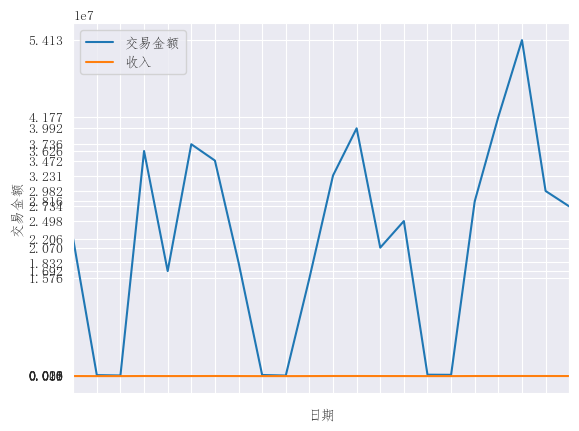

In [113]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
#mpl.rcParams['axes.unicode_minus'] = False

import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['FangSong', 'Arial']})

 
# 先按日期和业务类型求和
#df_sum = df.groupby(['日期', '业务类型']).sum()

# 再按日期求和
#df_sum_date = df_sum.groupby('日期').sum()

# 生成交易金额和收入的折线图
df_sum_date[['交易金额', '收入']].plot.line()

# Set x and y axis labels
plt.xlabel('日期')
plt.ylabel('交易金额')

# Set x and y axis tick values
plt.xticks(df_sum_date.index)
plt.yticks(df_sum_date['交易金额'])

plt.show()

In [111]:
# 生成不同业务的交易金额折线图
#df_sum.pivot_table(index='日期', columns='业务类型', values='交易金额').plot.line()
print(df_sum)
# Get unique business types
business_types = df_sum['业务类型'].unique()
print(business_types)
'''
# Generate line plot for each business type
for business_type in business_types:
    # Filter dataframe by business type
    df_filtered = df_sum[df_sum['业务类型'] == business_type]
    
    # Generate line plot for filtered dataframe
    df_filtered.pivot_table(index='日期', values='交易金额').plot.line(title=business_type)
'''

                                           笔数         交易金额       收入       成本
日期                            业务类型                                          
1970-01-01 00:00:00.020230310 网关与支付单报送    588    514361.36  3282.95  1034.59
                              跨境人民币付款       7   2584404.70  2165.22   250.00
                              跨境人民币收款       4  18960768.32  4413.77     0.00
1970-01-01 00:00:00.020230311 网关与支付单报送    774    163472.02  1018.21   332.24
1970-01-01 00:00:00.020230312 网关与支付单报送    419    102350.41   672.91   210.13
...                                       ...          ...      ...      ...
1970-01-01 00:00:00.020230330 跨境人民币收款       5  26848886.40  9064.04     0.00
                              跨境付款(离岸换汇)    1    481188.00  5705.65   215.25
1970-01-01 00:00:00.020230331 网关与支付单报送    672    212862.56  1390.75   428.17
                              跨境人民币付款      13   4858342.90  3637.05   778.62
                              跨境人民币收款       4  22273473.12  6980.73     0.00

KeyError: '业务类型'